# A/B Testing
El A/B testing, también conocido como pruebas A/B, es una técnica de experimentación que se usa para comparar dos o más variantes de un elemento para identificar cuál funciona mejor en términos de un objetivo específico. Este método se emplea ampliamente en áreas como marketing digital, diseño de interfaces de usuario y optimización de productos, ya que permite tomar decisiones basadas en datos sobre cómo mejorar el rendimiento de una página web, una aplicación o una campaña.

## Objetivo del A/B Testing
El objetivo principal del A/B testing es determinar qué variante de un cambio específico (como un diseño, contenido o funcionalidad) logra mejores resultados en un grupo de usuarios o clientes. Esto se realiza al dividir a los usuarios en grupos y exponer a cada grupo a una variante distinta. Los resultados se comparan estadísticamente para verificar si una de las variantes genera una mejora significativa.

## Proceso de A/B Testing
1. **Definición del objetivo**: El primer paso es identificar un objetivo claro y específico, como mejorar la tasa de clics, aumentar la conversión o reducir el tiempo de permanencia en una página.

2. **Formulación de hipótesis**: Se plantea una hipótesis que establece qué cambio o variante se espera que mejore los resultados. Por ejemplo, "Cambiar el color del botón de compra aumentará la tasa de conversión".

3. **Definición de variantes**: En un A/B test, se crean dos o más versiones del elemento a analizar. La versión actual o de control suele llamarse "A", mientras que las nuevas versiones se denominan "B", "C", etc.

4. **Segmentación de la muestra**: Se selecciona y divide a los usuarios o visitantes en grupos de manera aleatoria. Cada grupo verá una de las variantes para asegurar que los resultados no estén sesgados.

5. **Medición de los resultados**: Se define un periodo de tiempo para observar los resultados y se miden las métricas clave, como el porcentaje de clics, conversiones o interacción de los usuarios.

6. **Análisis estadístico**: Se analiza la diferencia entre los grupos para ver si los cambios observados son significativos. Esto implica el uso de pruebas estadísticas como la prueba t de Student, prueba z o ANOVA para asegurarse de que los resultados no se deben al azar.

7. **Implementación de la mejor variante**: Si se encuentra una mejora significativa en alguna variante, esta puede ser implementada de manera permanente. En caso de que no haya diferencia estadística, es posible que el cambio propuesto no tenga el impacto esperado, y se puede revisar la hipótesis o el diseño del experimento.

## Métodos Estadísticos Comunes en A/B Testing
1. **Prueba T de Student**: Se usa para comparar la media de dos grupos, ideal para cuando la muestra es pequeña y la distribución es aproximadamente normal.

2. **Prueba Z**: Se usa para comparar proporciones en grandes muestras. Es común en experimentos donde se comparan tasas de clic o de conversión entre dos variantes.

3. **ANOVA (Análisis de Varianza)**: Permite comparar tres o más grupos para ver si existen diferencias significativas entre ellos, lo cual es útil en pruebas multivariables.

4. **Pruebas no paramétricas**: Como la prueba de Mann-Whitney o la prueba de Kruskal-Wallis, que no asumen normalidad y se usan cuando los datos no cumplen los supuestos necesarios para las pruebas anteriores.

## Cómo elegir el método estadístico

(Ver Diagrama de árbol)

## Ejemplo de un A/B Test
Supongamos que un sitio de e-commerce desea aumentar la tasa de clic en el botón "Comprar ahora". Se plantea una hipótesis de que un botón de color rojo tendrá un mayor número de clics que el botón actual, que es azul. El equipo de marketing lleva a cabo un A/B test, mostrando el botón rojo a la mitad de los usuarios (grupo B) y el botón azul al resto (grupo A). Después de una semana, se recogen los datos de clics y se analiza la diferencia entre ambos grupos.

Si el análisis estadístico demuestra que el grupo B (botón rojo) tiene una tasa de clic significativamente mayor que el grupo A, se podría considerar implementar el cambio de color de botón de manera definitiva.



In [19]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


from src import ab_testing as ab

In [20]:
df = pd.read_csv('Data/ab_testing_data_control_test.csv')

In [21]:
df

,user_id,grupo,gasto,conversion,tiempo_en_sitio,número_visitas,tipo_dispositivo,edad,género
0,1,control,53.55,1,13.71,0,mobile,51,female
1,2,test,23.29,0,8.63,4,computer,42,female
2,3,test,57.60,0,9.87,2,computer,48,female
3,4,test,62.21,0,10.17,6,computer,66,female
4,5,control,61.20,0,12.55,1,computer,58,male
...,...,...,...,...,...,...,...,...,...
995,996,control,23.60,0,6.12,1,tablet,69,female
996,997,test,37.76,1,7.91,2,computer,69,male
997,998,control,49.26,1,7.25,0,tablet,43,male
998,999,test,41.41,0,13.72,2,mobile,62,female


In [22]:
df.isnull().sum()

user_id             0
grupo               0
gasto               0
conversion          0
tiempo_en_sitio     0
número_visitas      0
tipo_dispositivo    0
edad                0
género              0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           1000 non-null   int64  
 1   grupo             1000 non-null   object 
 2   gasto             1000 non-null   float64
 3   conversion        1000 non-null   int64  
 4   tiempo_en_sitio   1000 non-null   float64
 5   número_visitas    1000 non-null   int64  
 6   tipo_dispositivo  1000 non-null   object 
 7   edad              1000 non-null   int64  
 8   género            1000 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


In [24]:
def exploracion_dataframe(dataframe, columna_control):

    """
    Realiza una exploración inicial del DataFrame, mostrando duplicados, nulos, tipos de datos,
    valores de columnas categóricas, y estadísticas descriptivas separadas por categorías.

    Parámetros:
    -----------
    dataframe : pd.DataFrame
        DataFrame que contiene los datos a explorar.
    columna_control : str
        Nombre de la columna categórica que se utilizará para filtrar los datos y analizar
        las estadísticas descriptivas por cada valor único en esta columna.

    Salida:
    -------
    None
        La función imprime los siguientes elementos:
            - Número de duplicados en el DataFrame.
            - Porcentaje de valores nulos por columna (solo columnas con valores nulos).
            - Tipos de datos de cada columna.
            - Valores únicos en cada columna categórica.
            - Estadísticas descriptivas de columnas categóricas y numéricas,
              desglosadas por cada valor en columna_control.
    """

    
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    

    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
     
    for categoria in dataframe[columna_control].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_control] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

In [25]:
exploracion_dataframe(df,"grupo")

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
user_id,int64
grupo,object
gasto,float64
conversion,int64
tiempo_en_sitio,float64
número_visitas,int64
tipo_dispositivo,object
edad,int64
género,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna GRUPO tiene las siguientes valore únicos:


,count
grupo,
test,579
control,421


La columna TIPO_DISPOSITIVO tiene las siguientes valore únicos:


,count
tipo_dispositivo,
mobile,348
tablet,339
computer,313


La columna GÉNERO tiene las siguientes valore únicos:


,count
género,
female,463
male,447
other,90



 ..................... 

Los principales estadísticos de las columnas categóricas para el CONTROL son: 


,count,unique,top,freq
grupo,421,1,control,421
tipo_dispositivo,421,3,mobile,149
género,421,3,female,202



 ..................... 

Los principales estadísticos de las columnas numéricas para el CONTROL son: 


,count,mean,std,min,25%,50%,75%,max
user_id,421.0,501.565321,294.980933,1.00,237.00,516.00,751.00,998.00
gasto,421.0,52.299074,19.287390,0.00,39.28,51.77,65.07,100.54
conversion,421.0,0.280285,0.449673,0.00,0.00,0.00,1.00,1.00
tiempo_en_sitio,421.0,10.028242,3.144479,1.28,7.80,10.01,12.33,17.53
número_visitas,421.0,1.895487,1.312396,0.00,1.00,2.00,3.00,8.00
edad,421.0,44.092637,14.934571,18.00,31.00,45.00,57.00,69.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el TEST son: 


,count,unique,top,freq
grupo,579,1,test,579
tipo_dispositivo,579,3,tablet,206
género,579,3,male,265



 ..................... 

Los principales estadísticos de las columnas numéricas para el TEST son: 


,count,mean,std,min,25%,50%,75%,max
user_id,579.0,499.725389,284.509684,2.00,260.00,495.00,749.500,1000.00
gasto,579.0,51.809603,19.961986,0.00,38.50,51.57,64.675,113.86
conversion,579.0,0.303972,0.460369,0.00,0.00,0.00,1.000,1.00
tiempo_en_sitio,579.0,9.988774,3.027815,1.03,7.99,10.00,11.905,21.78
número_visitas,579.0,2.001727,1.314675,0.00,1.00,2.00,3.000,6.00
edad,579.0,42.654577,14.545176,18.00,31.00,41.00,55.000,69.00


In [26]:
df.columns

Index(['user_id', 'grupo', 'gasto', 'conversion', 'tiempo_en_sitio',
       'número_visitas', 'tipo_dispositivo', 'edad', 'género'],
      dtype='object')

Text(0.5, 1.0, 'Tiempo en la web')

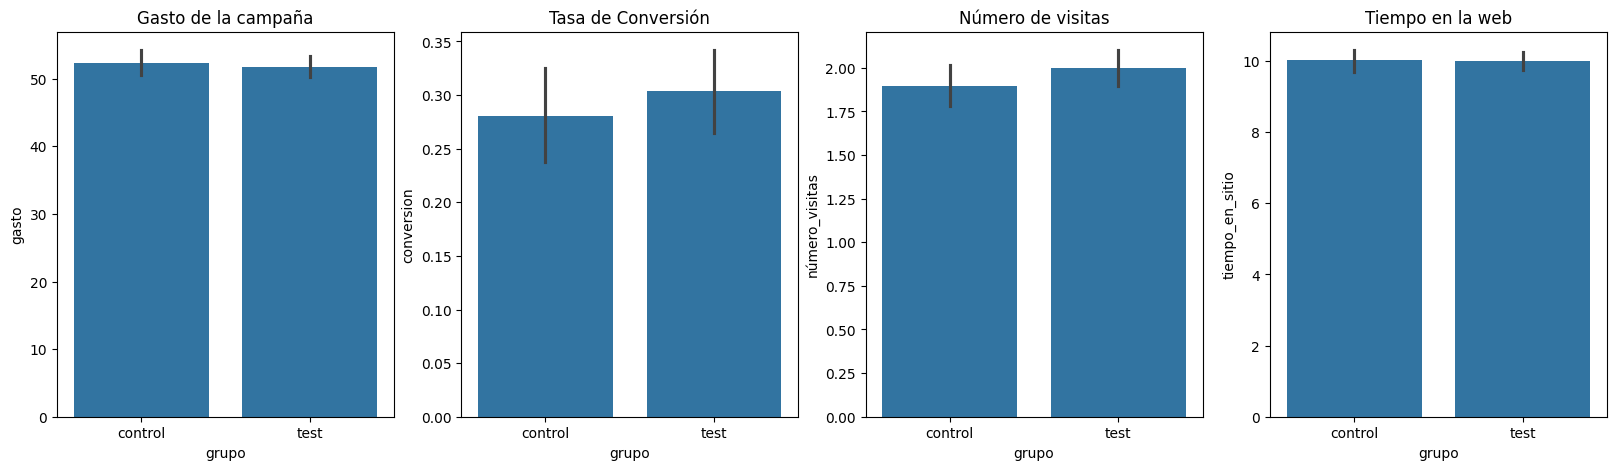

In [27]:
# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Gráfico 1: Tasa de Clicks (CTR)
sns.barplot(x="grupo", y="gasto", data=df, ax=axes[0])
axes[0].set_title("Gasto de la campaña")

# Gráfico 2: Tasa de Conversión (CR)
sns.barplot(x="grupo", y="conversion", data=df, ax=axes[1])
axes[1].set_title("Tasa de Conversión")

# Gráfico 3: Costo por Adquisición (CPA)
sns.barplot(x="grupo", y="número_visitas", data=df, ax=axes[2])
axes[2].set_title("Número de visitas")

sns.barplot(x="grupo", y="tiempo_en_sitio", data=df, ax=axes[3])
axes[3].set_title("Tiempo en la web")

In [33]:
metricas = ['gasto', 'conversion', 'número_visitas', 'tiempo_en_sitio']


In [29]:
ab.AB_testing(df,'grupo',metricas)

Para la columna GASTO los datos siguen una distribución normal.
Para la columna CONVERSION los datos no siguen una distribución normal.
Para la columna NÚMERO_VISITAS los datos no siguen una distribución normal.
Para la columna TIEMPO_EN_SITIO los datos siguen una distribución normal.

-----------------------------

Para la métrica GASTO las varianzas son homogéneas entre grupos.
Para la métrica CONVERSION las varianzas son homogéneas entre grupos.
Para la métrica NÚMERO_VISITAS las varianzas son homogéneas entre grupos.
Para la métrica TIEMPO_EN_SITIO las varianzas son homogéneas entre grupos.

-----------------------------

Para la columna GASTO se va a realizar el test de Z-SCORE
No hay evidencia de una diferencia significativa entre los grupos.

-----------------------------

Para la columna CONVERSION se va a realizar el test de MANN WHITNEY
Para la métrica conversion, las medianas son iguales.

-----------------------------

Para la columna NÚMERO_VISITAS se va a realizar el test

In [30]:
ab.AB_testing(df,'género', metricas)

Para la columna GASTO los datos siguen una distribución normal.
Para la columna CONVERSION los datos no siguen una distribución normal.
Para la columna NÚMERO_VISITAS los datos no siguen una distribución normal.
Para la columna TIEMPO_EN_SITIO los datos siguen una distribución normal.

-----------------------------

Para la métrica GASTO las varianzas son homogéneas entre grupos.
Para la métrica CONVERSION las varianzas son homogéneas entre grupos.
Para la métrica NÚMERO_VISITAS las varianzas son homogéneas entre grupos.
Para la métrica TIEMPO_EN_SITIO las varianzas son homogéneas entre grupos.

-----------------------------

Para la columna GASTO se va a realizar el test de ANOVA
No hay evidencia de diferencias significativas entre los grupos.

-----------------------------

Para la columna CONVERSION se va a realizar el test de MANN WHITNEY
Para la métrica conversion, las medianas son iguales.

-----------------------------

Para la columna NÚMERO_VISITAS se va a realizar el test de 